![](https://www.nasa.gov/sites/default/files/thumbnails/image/nasa-logo-web-rgb.png)

# Planetary Mystery

Welcome to your first day as a data intern for NASA! As a fun exercise, all interns will be working to solve... a planetary mystery!

The dataset you will be working on contains weather data for a planet in our solar system, but the identity of that planet is unknown. Your task is to use your data analytics chops to identify the mystery planet!

As usual, you will begin by exploring your dataset.

The dataset, provided by NASA, is called `planet_weather.csv`, and it contains the following information:

- **terrestrial_date**: Date on planet Earth, captured as `yyyy-mm-dd`.

- **sol**: number of elapsed planetary days since beginning measurement.

- **ls**: solar longitude. 0: fall equinox. 90: winter solstice. 180: spring equinox. 270: summer solstice.

- **month**: the month number on the mystery planet.

- **min_temp**: the minimum temperature, in Celsius, during a single day.

- **pressure**: atmospheric pressure, in Pascals.

- **wind_speed**: average wind speed, in meters per second.

- **atmo_opacity**: atmospheric opacity.



# Task 1: Data Inspection

![](https://media.giphy.com/media/pz7LNMYN2dj0hgKaHj/giphy.gif)

In [1]:
# import pandas and plotly express libraries
import pandas as pd
import plotly.express as px

In [2]:
# load planet_weather.csv data from datasets folder
df = pd.read_csv('datasets/planet_weather.csv')

In [3]:
# preview the data
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


In [7]:
# How many rows and columns are there in the dataset?
df.shape

(1894, 10)

In [9]:
# what are the names of all the columns?
df.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp',
       'pressure', 'wind_speed', 'atmo_opacity'],
      dtype='object')

In [10]:
# What is the data type of each column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1894 non-null   int64  
 1   terrestrial_date  1894 non-null   object 
 2   sol               1894 non-null   int64  
 3   ls                1894 non-null   int64  
 4   month             1894 non-null   object 
 5   min_temp          1867 non-null   float64
 6   max_temp          1867 non-null   float64
 7   pressure          1867 non-null   float64
 8   wind_speed        0 non-null      float64
 9   atmo_opacity      1894 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 148.1+ KB


In [14]:
# How many null values are there in each column?
df.isna().sum()

id                     0
terrestrial_date       0
sol                    0
ls                     0
month                  0
min_temp              27
max_temp              27
pressure              27
wind_speed          1894
atmo_opacity           0
dtype: int64

In [13]:
# Provide a statistical summary of the DataFrame
df.describe()

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


# Task 2: Data Cleaning

![](https://media.giphy.com/media/l49JEBkw8tD64fbeE/giphy-downsized-large.gif)

In [21]:
# Looks like the wind speed sensor on the Rover was broken
# Delete wind_speed column, which is filled with null values
df = df.drop('wind_speed', axis = 1)

In [19]:
# How many unique values are there in the atmo_opacity column?
# hint: both .unique() and .value_counts() will work here
df['atmo_opacity'].value_counts()

Sunny    1891
--          3
Name: atmo_opacity, dtype: int64

In [22]:
# The atmosphere sensors were faulty and did not capture accurate data
# Delete atmo_opacity column, which mostly contains identical values
df = df.drop('atmo_opacity', axis = 1)

In [26]:
# Checking if drop worked
df.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp',
       'pressure'],
      dtype='object')

# Task 3: Data Analysis & Visualization

![](https://media.giphy.com/media/1n8aGJBEXuW0M7ELrB/giphy.gif)



In [29]:
# How many months are there on this planet?
df['month'].nunique()

12

In [48]:
# What is the average min_temp for each month?
# round(df['min_temp'].mean(), 2)
by_month = df['min_temp'].groupby(df['month']).mean().round(2).reset_index()
by_month

,month,min_temp
0,Month 1,-77.16
1,Month 10,-71.98
2,Month 11,-71.99
3,Month 12,-74.45
4,Month 2,-79.93
5,Month 3,-83.31
6,Month 4,-82.75
7,Month 5,-79.31
8,Month 6,-75.30
9,Month 7,-72.28


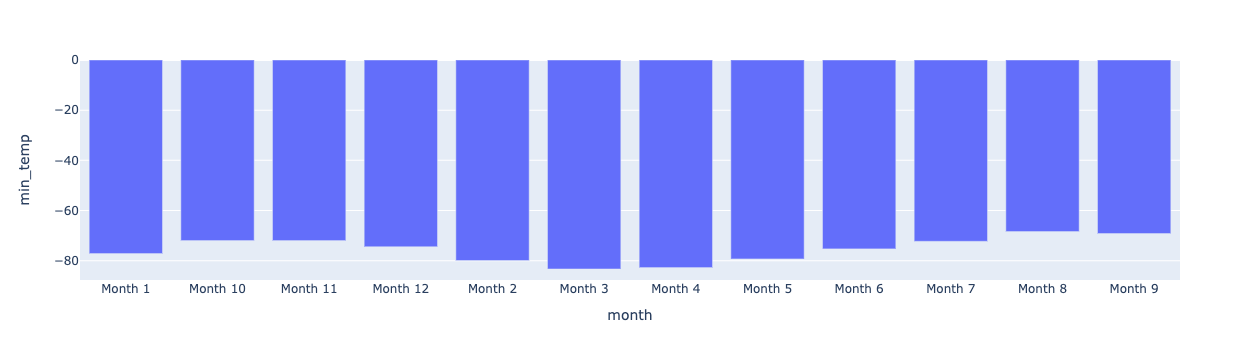

In [49]:
# Plot a bar chart of the average min_temp by month
fig = px.bar(by_month, x='month', y='min_temp')
fig.show()

Based on the minimum temperature, what is the coldest month? The warmest month?

The coldest month is month 8. The warmest month is month 3.

In [50]:
# What is the average pressure for each month?
by_month_pres = df['pressure'].groupby(df['month']).mean().round(2).reset_index()
by_month_pres

,month,pressure
0,Month 1,862.49
1,Month 10,887.31
2,Month 11,857.01
3,Month 12,842.16
4,Month 2,889.46
5,Month 3,877.32
6,Month 4,806.33
7,Month 5,748.56
8,Month 6,745.05
9,Month 7,795.11


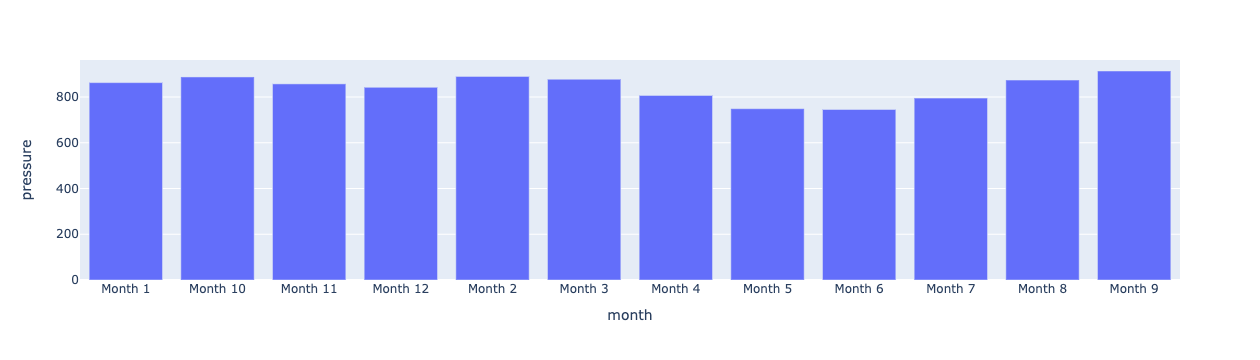

In [52]:
# Create a bar chart of the average atmospheric pressure by month
fig = px.bar(by_month_pres, x='month', y='pressure')
fig.show()

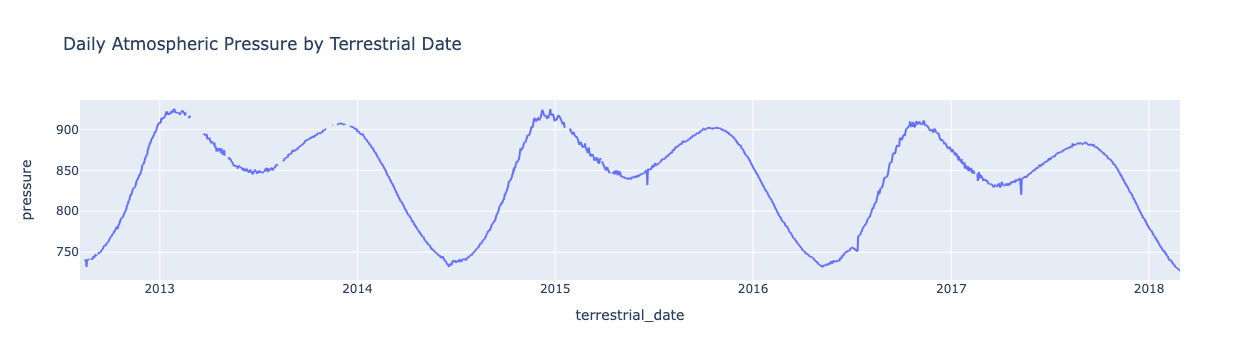

In [53]:
# Plot a line chart of the daily atmospheric pressure by terrestrial date
# note: you do not need to modify the dataframe
# use the original one you loaded at the beginning of the milestone.
fig = px.line(df, x='terrestrial_date', y='pressure', title='Daily Atmospheric Pressure by Terrestrial Date')
fig.show()

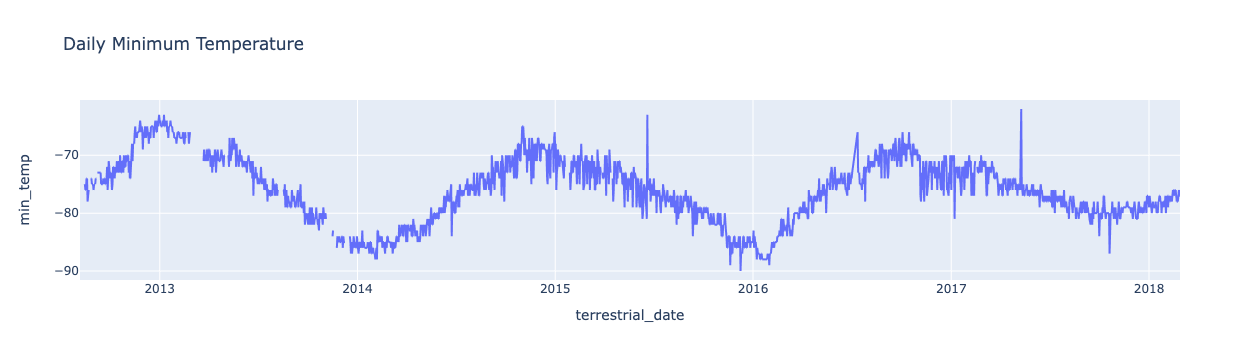

In [54]:
# Plot a line chart the daily minimum temp
# note: you do not need to modify the dataframe
# use the original one you loaded at the beginning of the milestone.
fig = px.line(df, x='terrestrial_date', y='min_temp', title='Daily Minimum Temperature')
fig.show()

### Based on this information, approximately how many earth days are there in a year on this planet?

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Note**: To get an approximate range for how long a "year" is on this planet, look at the plots of the atmospheric pressure and the temperatures by day. Use the visualizations to get a *rough estimate* between matching "peaks".</span>

The graphs peak every 2-ish years in January. From this, we can estimate that there are about 365 x 2 = 730 Earth days a year on this planet.


### What is the identity of the planet?

Go to [this website](https://spaceplace.nasa.gov/years-on-other-planets/en/) and see what planet this lines up with!

The planet that has the closest conversion from 2 Earth years is Mars, where each year is 687 Earth days.

## Congratulations on making your first extra-terrestrial discovery!

![](https://media.giphy.com/media/5ndfKr0Nv92LkWrKpU/giphy.gif)

# LevelUp

![](https://media.giphy.com/media/kjjRGpezebjaw/giphy.gif)

Earlier in the milestone you investigated how many months were in our Mystery Planet. Unfortunately, the answer (12) was not very satisfying. This is because there is no standard calendar for Mars. When the data was collected, they used 12 "months" though each month is longer than a typical Earth month. Let's investigate!

First, filter your dataset so that you are only looking at any `terrestrial_date` before 2014.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Note**: Since the `terrestrial_date` is a `string` data type, this is simply checking for all values that satisfy the condition `< '2014'` (<-- don't forget the quotes!) </span>

In [56]:
# filter to all values where terrestrial_date is before 2014
# store it in a new variable.
before_2014 = df[df['terrestrial_date']<'2014']
before_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 1453 to 1893
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                441 non-null    int64  
 1   terrestrial_date  441 non-null    object 
 2   sol               441 non-null    int64  
 3   ls                441 non-null    int64  
 4   month             441 non-null    object 
 5   min_temp          420 non-null    float64
 6   max_temp          420 non-null    float64
 7   pressure          420 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 31.0+ KB


<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>If done correctly, you will have a dataframe with `441` rows.</span>

Lastly, for each month in the dataframe, return both the `min` value and the `max` value of the `terrestrial_date` field.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint 1**: Use `.groupby()`</span>

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint 2**: In the dictionary for your `.agg()` function, pass a `list` of values. e.g. `{col_to_check: [func1, func2]}`. Remember to use the appropriate values / variables from the dataframe and the desired functions.</span>

In [58]:
# For each month, calculate the min & max value of the terrestrial_date field.
before_2014.groupby('month')['terrestrial_date'].agg(['min', 'max']).reset_index()

,month,min,max
0,Month 1,2013-08-01,2013-10-02
1,Month 10,2013-02-24,2013-04-12
2,Month 11,2013-04-13,2013-06-04
3,Month 12,2013-06-05,2013-07-31
4,Month 2,2013-10-03,2013-12-08
5,Month 3,2013-12-09,2013-12-31
6,Month 6,2012-08-07,2012-09-29
7,Month 7,2012-09-30,2012-11-19
8,Month 8,2012-11-20,2013-01-07
9,Month 9,2013-01-08,2013-02-23


How many Earth days, roughly, are there in each "month" in the mystery planet? Does that lineup with what you expected now that you know the identity of the mystery planet?

There are about 60 days, or 2 Earth months, for each "month" on Mars. Because 1 Mars month roughly equates 2 Earth months, one Mars year would equal 2 Earth years. This lines up with what we found earlier with the peak atmospheric pressure occuring every 2 years, if we assume the pressure peaks once a year on the planet.